In [9]:
#Import Libraries
import numpy as np
import pandas as pd
import opstrat as op
from scipy.stats import norm
import matplotlib.pyplot as plt
#from sympy import *
import sympy as sp

In [10]:
#Declare parameters
K=200    #spot price
St=208   #current stock price
r=4      #4% risk free rate
t=30     #time to expiry, 30 days 
v=20     #volatility 
type='c' #Option type call
#Black Scholes Model
bsm=op.black_scholes(K=K, St=St, r=r, t=t, 
                     v=v, type='c')

In [11]:
bsm['value']

{'option value': 10.210518559926442,
 'intrinsic value': 8,
 'time value': 2.2105185599264416}

In [12]:
bsm['value']['option value']

10.210518559926442

In [13]:
bsm['greeks']

{'delta': 0.7793593241701937,
 'gamma': 0.024868265088898882,
 'theta': -0.07559961986526405,
 'vega': 0.17686037602292404,
 'rho': 0.12484620893217029}

In [14]:
bsm['greeks']['theta']

-0.07559961986526405

###########################################################################################################################

In [15]:
N = norm.cdf

def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)

def BS_PUT(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)



In [16]:
S = sp.Symbol('S') 
K = sp.Symbol('K') 
T = sp.Symbol('T') 
r = sp.Symbol('r') 
sigma = sp.Symbol('sigma') 

d1 = (sp.log(S/K) + (r + sigma**2/2)*T) / (sigma*sp.sqrt(T))
print("Expression : {} ".format(d1))

nd = Derivative(d1, S)

Expression : (T*(r + sigma**2/2) + log(S/K))/(sqrt(T)*sigma) 


In [17]:
nd

Derivative((T*(r + sigma**2/2) + log(S/K))/(sqrt(T)*sigma), S)

In [18]:
n_d = nd.doit()
n_d

1/(S*sqrt(T)*sigma)

In [19]:
## S Effect on Option Value
St = 100
rf = 0.1
t = 1
sig = 0.3

Sp = np.arange(60,140,1)

In [20]:
part_gamma = n_d.subs([(T,t),(r,rf),(K,St),(sigma,sig),(S,Sp)])

In [21]:
gamma = part_gamma*part_gamma

In [22]:
gammas = [gamma.evalf(2, subs = {S:Sp[i]}) for i in range(len(Sp))]

In [23]:
gammas

[0.0031,
 0.0030,
 0.0029,
 0.0028,
 0.0027,
 0.0026,
 0.0026,
 0.0025,
 0.0024,
 0.0023,
 0.0023,
 0.0022,
 0.0021,
 0.0021,
 0.0020,
 0.0020,
 0.0019,
 0.0019,
 0.0018,
 0.0018,
 0.0017,
 0.0017,
 0.0017,
 0.0016,
 0.0016,
 0.0015,
 0.0015,
 0.0015,
 0.0014,
 0.0014,
 0.0014,
 0.0013,
 0.0013,
 0.0013,
 0.0013,
 0.0012,
 0.0012,
 0.0012,
 0.0012,
 0.0011,
 0.0011,
 0.0011,
 0.0011,
 0.0010,
 0.0010,
 0.0010,
 0.00099,
 0.00097,
 0.00095,
 0.00094,
 0.00092,
 0.00090,
 0.00089,
 0.00087,
 0.00085,
 0.00084,
 0.00083,
 0.00081,
 0.00080,
 0.00078,
 0.00077,
 0.00076,
 0.00075,
 0.00073,
 0.00072,
 0.00071,
 0.00070,
 0.00069,
 0.00068,
 0.00067,
 0.00066,
 0.00065,
 0.00064,
 0.00063,
 0.00062,
 0.00061,
 0.00060,
 0.00059,
 0.00058,
 0.00058]

In [24]:
n_d1 = np.array([part_gamma.evalf(2, subs = {S:Sp[i]}) for i in range(len(Sp))])
n_d1

array([0.056, 0.055, 0.054, 0.053, 0.052, 0.051, 0.051, 0.050, 0.049,
       0.048, 0.048, 0.047, 0.046, 0.046, 0.045, 0.044, 0.044, 0.043,
       0.043, 0.042, 0.042, 0.041, 0.041, 0.040, 0.040, 0.039, 0.039,
       0.038, 0.038, 0.037, 0.037, 0.037, 0.036, 0.036, 0.035, 0.035,
       0.035, 0.034, 0.034, 0.034, 0.033, 0.033, 0.033, 0.032, 0.032,
       0.032, 0.031, 0.031, 0.031, 0.031, 0.030, 0.030, 0.030, 0.030,
       0.029, 0.029, 0.029, 0.029, 0.028, 0.028, 0.028, 0.028, 0.027,
       0.027, 0.027, 0.027, 0.026, 0.026, 0.026, 0.026, 0.026, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.024, 0.024, 0.024],
      dtype=object)

In [25]:
vegas = St*np.sqrt(t)*n_d1

In [26]:
d1_call = (np.log(Sp/St) + (rf + sig**2/2)*t) / (sig*np.sqrt(t))
d2_call = d1_call - sig * np.sqrt(t)
d1_put = (np.log(Sp/St) + (rf + sig**2/2)*t) / (sig*np.sqrt(t))
d2_put = d1_put - sig* np.sqrt(t)


In [27]:
Delta_Call = N(d1_call)
Delta_Put = N(d1_call) - 1
Gamma = np.array(gammas)
Vega = vegas

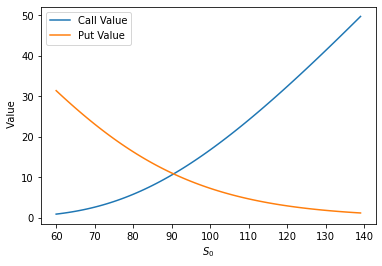

In [28]:
calls = [BS_CALL(s, St, t, rf, sig) for s in Sp]
puts = [BS_PUT(s, St, t, rf, sig) for s in Sp]
plt.plot(Sp, calls, label='Call Value')
plt.plot(Sp, puts, label='Put Value')
plt.xlabel('$S_0$')
plt.ylabel(' Value')
plt.legend()

In [29]:
df_s = pd.DataFrame(list(zip(calls, puts, Sp, Delta_Call, Delta_Put, Gamma, Vega)),columns =["calls", "puts", "S_0","Delta_Call","Delta_Put","Gamma", "Vega"])
df_s

,calls,puts,S_0,Delta_Call,Delta_Put,Gamma,Vega
0,0.859870,31.343612,60,0.111343,-0.888657,0.0031,5.55419921875000
1,0.976570,30.460312,61,0.122147,-0.877853,0.0030,5.46264648437500
2,1.104338,29.588080,62,0.133474,-0.866526,0.0029,5.37719726562500
3,1.243686,28.727428,63,0.145305,-0.854695,0.0028,5.29174804687500
4,1.395109,27.878851,64,0.157619,-0.842381,0.0027,5.20629882812500
...,...,...,...,...,...,...,...
75,45.909926,1.393667,135,0.931053,-0.068947,0.00061,2.46887207031250
76,46.842593,1.326335,136,0.934259,-0.065741,0.00060,2.45056152343750
77,47.778397,1.262139,137,0.937325,-0.062675,0.00059,2.43225097656250
78,48.717200,1.200942,138,0.940258,-0.059742,0.00058,2.41699218750000


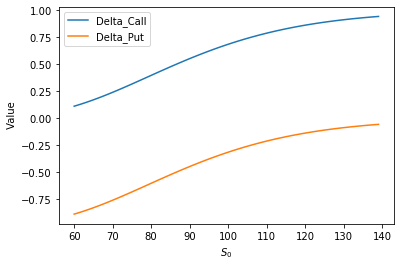

In [30]:
plt.plot(df_s['S_0'], df_s['Delta_Call'], label='Delta_Call')
plt.plot(df_s['S_0'], df_s['Delta_Put'], label='Delta_Put')
plt.xlabel('$S_0$')
plt.ylabel(' Value')
plt.legend()

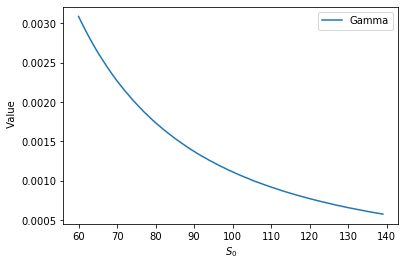

In [31]:
plt.plot(df_s['S_0'], df_s['Gamma'], label='Gamma')
plt.xlabel('$S_0$')
plt.ylabel(' Value')
plt.legend()

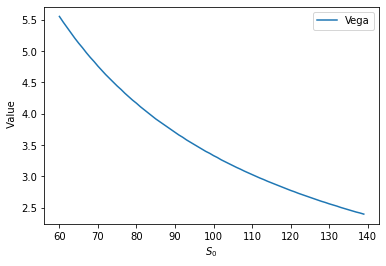

In [32]:
plt.plot(df_s['S_0'], df_s['Vega'], label='Vega')
plt.xlabel('$S_0$')
plt.ylabel(' Value')
plt.legend()

In [33]:
## σ Effect on Black-Scholes Value

K = 100
r = 0.1
T = 1
Sigmas = np.arange(0.1, 10, 0.01)
S = 100

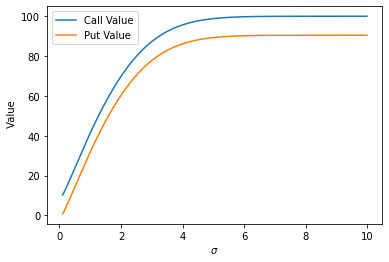

In [34]:
calls = [BS_CALL(S, K, T, r, sig) for sig in Sigmas]
puts = [BS_PUT(S, K, T, r, sig) for sig in Sigmas]
plt.plot(Sigmas, calls, label='Call Value')
plt.plot(Sigmas, puts, label='Put Value')
plt.xlabel('$\sigma$')
plt.ylabel(' Value')
plt.legend()

In [35]:
df_Sigma = pd.DataFrame(list(zip(calls, puts, Sigmas)),columns =["calls", "puts", "Sigmas"])
df_Sigma.head()

,calls,puts,Sigmas
0,10.308151,0.791893,0.10
1,10.548767,1.032509,0.11
2,10.808215,1.291956,0.12
3,11.083128,1.566870,0.13
4,11.370818,1.854559,0.14


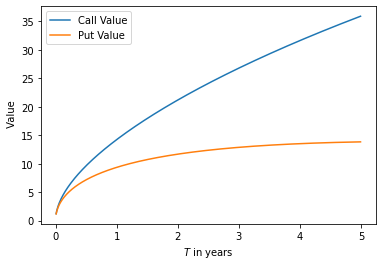

In [36]:
## Effect of Time on Black-Scholes Price
K = 100
r = 0.05
T = np.arange(0, 5, 0.01)
sigma = 0.3
S = 100

calls = [BS_CALL(S, K, t, r, sigma) for t in T]
puts = [BS_PUT(S, K, t, r, sigma) for t in T]
plt.plot(T, calls, label='Call Value')
plt.plot(T, puts, label='Put Value')
plt.xlabel('$T$ in years')
plt.ylabel(' Value')
plt.legend()

In [37]:
df_Time = pd.DataFrame(list(zip(calls, puts, T)),columns =["calls", "puts", "Time"])
df_Time.head()

,calls,puts,Time
0,NaN,NaN,0.00
1,1.221643,1.171655,0.01
2,1.742041,1.642091,0.02
3,2.146985,1.997097,0.03
4,2.492132,2.292331,0.04


Text(0.5, 1.0, 'MS Rolling Volatility')

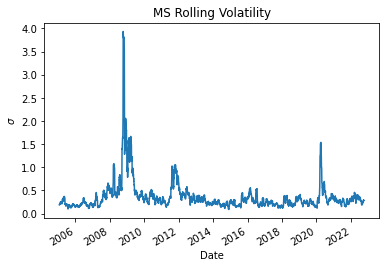

In [38]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

start = dt.datetime(2005,1,1)  
end =dt.datetime(2022,10,1)
symbol = 'MS' ###using Morgan Stanley as an example
source = 'yahoo'
data = web.DataReader(symbol, source, start, end)
data['change'] = data['Adj Close'].pct_change()
data['rolling_sigma'] = data['change'].rolling(20).std() * np.sqrt(255)


data.rolling_sigma.plot()
plt.ylabel('$\sigma$')
plt.title('MS Rolling Volatility')

##### The script below calculates the rolling standard deviation for Morgan Stanley over approximately 7 years. Notice that the volatility is in no way stable, if we take the standard deviation over the entire sample it is approximately 0.28 , however, notice that in early-mid 2020 during there is a large spike. As mentioned, the Black-Scholes model assumes this parameter is constant. 



In [39]:
data

,High,Low,Open,Close,Volume,Adj Close,change,rolling_sigma
Date,,,,,,,,
2004-12-31,55.810001,55.209999,55.259998,55.520000,2449700.0,32.560078,NaN,NaN
2005-01-03,56.529999,55.709999,55.970001,55.900002,5105800.0,32.782940,0.006845,NaN
2005-01-04,56.110001,54.759998,56.000000,55.299999,6100300.0,32.431065,-0.010733,NaN
2005-01-05,55.919998,54.980000,55.049999,54.980000,5072100.0,32.243382,-0.005787,NaN
2005-01-06,56.619999,55.770000,55.950001,56.279999,5991400.0,33.005783,0.023645,NaN
...,...,...,...,...,...,...,...,...
2022-09-26,81.660004,79.010002,80.919998,79.760002,8496000.0,78.993935,-0.021470,0.277761
2022-09-27,80.849998,78.349998,80.699997,79.480003,6855400.0,78.716629,-0.003510,0.273604
2022-09-28,81.889999,79.690002,79.760002,81.470001,6693500.0,80.687515,0.025038,0.290062


In [40]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close,change,rolling_sigma
count,4469.000000,4469.000000,4469.000000,4469.000000,4.469000e+03,4469.000000,4468.000000,4449.000000
mean,45.066527,43.886205,44.487532,44.477675,1.445339e+07,36.181413,0.000657,0.366222
std,21.911156,21.534901,21.724486,21.722172,1.353730e+07,19.979701,0.031309,0.349583
min,10.210000,6.710000,9.190000,9.200000,1.120500e+06,7.057823,-0.258929,0.089414
25%,28.070000,27.320000,27.730000,27.750000,7.588000e+06,22.191811,-0.010681,0.206687
50%,41.720001,40.500000,41.040001,41.169998,1.106180e+07,31.923801,0.000363,0.281669
75%,55.110001,53.630001,54.430000,54.369999,1.724660e+07,43.557819,0.011827,0.376563
max,109.730003,107.150002,108.190002,108.730003,3.297861e+08,105.765915,0.869835,3.934635


Text(0, 0.5, 'Density')

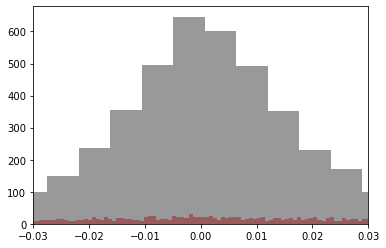

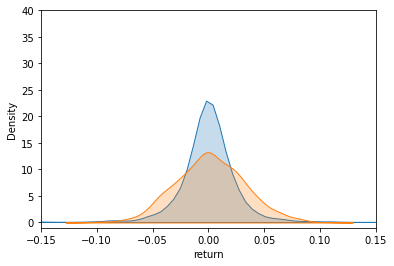

In [41]:
std = data.change.std()
WT = np.random.normal(data.change.mean() ,std, size=2000)
plt.hist(np.exp(WT)-1,bins=300,color='red',alpha=0.4);
plt.hist(data.change,bins=200,color='black', alpha=0.4);
plt.xlim([-0.03,0.03])

import seaborn as sns

fig, ax = plt.subplots()
ax = sns.kdeplot(data=data['change'].dropna(), label='Empirical', ax=ax,shade=True)
ax = sns.kdeplot(data=WT, label='Log Normal', ax=ax,shade=True)
plt.xlim([-0.15,0.15])
plt.ylim([-1,40])
plt.xlabel('return')
plt.ylabel('Density')

##### Another key problem is that the model underestimates the tail density. The KDE plot below shows the empircal verus a normal distribution for Morgan Stanley stock. This means that Black-Scholes will underestimate the value of out-of-the-money options. Both of these problems will be addressed in future articles. 